# 1 - Libraries 

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.utils import to_categorical
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [20]:
#load and process
def load_and_process(data_path):
    data = pd.read_csv(data_path)
    data = data.to_numpy()
    np.random.shuffle(data)
    x = data[:,1:].reshape(-1,28,28,1)/255.0
    y = data[:,0].astype(np.int32)
    y = to_categorical(y, num_classes=len(set(y)))

    return x,y

# 2 - Data Path 

In [21]:
train_data_path = "datasets/train.csv"
test_data_path = "datasets/test.csv"

x, y = load_and_process(train_data_path)
test = pd.read_csv(test_data_path)
test = test.to_numpy()
test = test[:,:].reshape(-1,28,28,1)/255.0

In [22]:
print(x.shape,y.shape,test.shape)

(42000, 28, 28, 1) (42000, 10) (28000, 28, 28, 1)


No handles with labels found to put in legend.


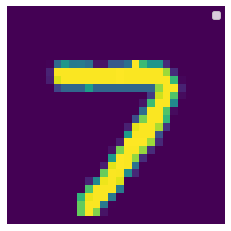

7


In [23]:
index = 11
vis = x.reshape(42000,28,28)
plt.imshow(vis[index,:,:])
plt.legend()
plt.axis("off")
plt.show()
print(np.argmax(y[index]))

In [24]:
numberOfClass = y.shape[1]

# 3 - Model

In [25]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3), input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 128, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units = 256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(units = numberOfClass)) #output
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])

# 4 - Model Training

In [26]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33)

hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=2000)

Epoch 1/50
15/15 [==============================] - 1s 48ms/step - loss: 1.1199 - accuracy: 0.6659 - val_loss: 2.1282 - val_accuracy: 0.2237
Epoch 2/50
15/15 [==============================] - 1s 37ms/step - loss: 0.2958 - accuracy: 0.9167 - val_loss: 2.2328 - val_accuracy: 0.1148
Epoch 3/50
15/15 [==============================] - 1s 37ms/step - loss: 0.1702 - accuracy: 0.9503 - val_loss: 2.4947 - val_accuracy: 0.1148
Epoch 4/50
15/15 [==============================] - 1s 37ms/step - loss: 0.1235 - accuracy: 0.9633 - val_loss: 2.7988 - val_accuracy: 0.1148
Epoch 5/50
15/15 [==============================] - 1s 37ms/step - loss: 0.0949 - accuracy: 0.9724 - val_loss: 3.0432 - val_accuracy: 0.1148
Epoch 6/50
15/15 [==============================] - 1s 37ms/step - loss: 0.0803 - accuracy: 0.9753 - val_loss: 3.2699 - val_accuracy: 0.1148
Epoch 7/50
15/15 [==============================] - 1s 37ms/step - loss: 0.0672 - accuracy: 0.9794 - val_loss: 3.5805 - val_accuracy: 0.1148
Epoch 8/50
15

In [27]:
model.save_weights("deneme.h5")

# 6 - Model Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


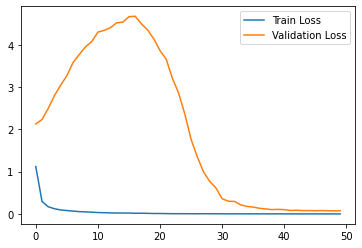

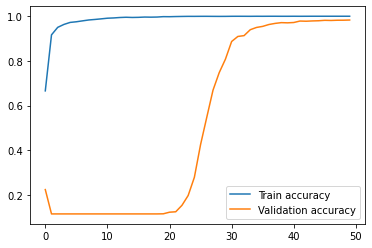

In [28]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label = "Train Loss")
plt.plot(hist.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train accuracy")
plt.plot(hist.history["val_accuracy"],label = "Validation accuracy")
plt.legend()
plt.show()

In [29]:
y_pred = model.predict_classes(test)
sub = pd.read_csv("datasets/sample_submission.csv")

In [30]:
sub["Label"] = y_pred
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [31]:
sub.to_csv("my_submission.csv", index = None)

## Saving History

In [32]:
import json

with open("deneme.json","w") as f:
    json.dump(hist.history, f)

## Loading History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


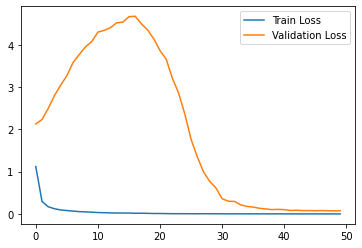

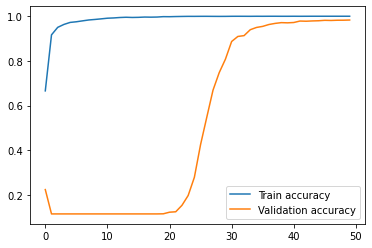

In [33]:
import codecs

with codecs.open("deneme.json","r",encoding="utf-8") as f:
    h = json.loads(f.read())

print(hist.history.keys())
plt.plot(h["loss"],label = "Train Loss")
plt.plot(h["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"],label = "Train accuracy")
plt.plot(h["val_accuracy"],label = "Validation accuracy")
plt.legend()
plt.show()